# 피처 시각화 실습 (1)
## MNIST 데이터셋
### 데이터의 구성
* 이미지: 28x28 픽셀의 흑백 이미지로 70000개로 구성. 각 이미지는 손으로 쓴 하나의 숫자를 나타내고, 이미지는 0-255 사이의 값으로 각 픽셀의 그레이스케일 값을 가짐
* 레이블: 0부터 9까지의 숫자

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

데이터 로드 & 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
# 숫자 2와 7을 대상으로 이진 분류 작업을 수행하는 CNN 모델 만들 예정

num_classes = 2 # 레이블 클래스 수
img_rows, img_cols = 28, 28

# 데이터 선택 (훈련 데이터, 테스트 데이터에서 2와 7에 해당하는 이미지만 선택되도록 함)
train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

# 데이터 추출
x_train = x_train[train_picks]
x_test = x_test[test_picks]

y_train = np.array(y_train[train_picks]==7,dtype=int) # 7에 해당하는 레이블은 1로, 2에 해당하는 레이블은 0으로 변환
y_test = np.array(y_test[test_picks]==7,dtype=int)

# 이미지 형태 조정
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 이미지 정규화
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# 레이블을 원-핫 인코딩 방식으로 변환
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 데이터셋의 정보 출
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


CNN 모델 구성

In [ ]:
model = Sequential()

model.add(Conv2D(32, [3, 3], input_shape = input_shape))
model.add(Activation("relu"))
model.add(Conv2D(64, [3, 3]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=10, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.8700 - loss: 0.3052 - val_accuracy: 0.9680 - val_loss: 0.1166
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.9828 - loss: 0.0537 - val_accuracy: 0.9762 - val_loss: 0.0771
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.9877 - loss: 0.0382 - val_accuracy: 0.9791 - val_loss: 0.0621
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.9918 - loss: 0.0296 - val_accuracy: 0.9825 - val_loss: 0.0621
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.9944 - loss: 0.0326 - val_accuracy: 0.9806 - val_loss: 0.0627
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9989 - loss: 0.0120 - val_accuracy: 0.9830 - val_loss: 0.0665
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.9998 - loss: 0.0068 - val_accuracy: 0.9845 - val_loss: 0.0607
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9996 - loss: 0.0072 - val_accuracy: 0.

## 1. Visualizing weights
### 첫 번째 컨볼루션 레이어의 가중치 시각화

<class 'numpy.ndarray'> (3, 3, 32)

Filter 1 in the first convolution layer : 
[[-0.03021852 -0.04270969  0.00387465]
 [ 0.0084391  -0.07829756  0.09356903]
 [ 0.02320068  0.11043055 -0.07893155]]


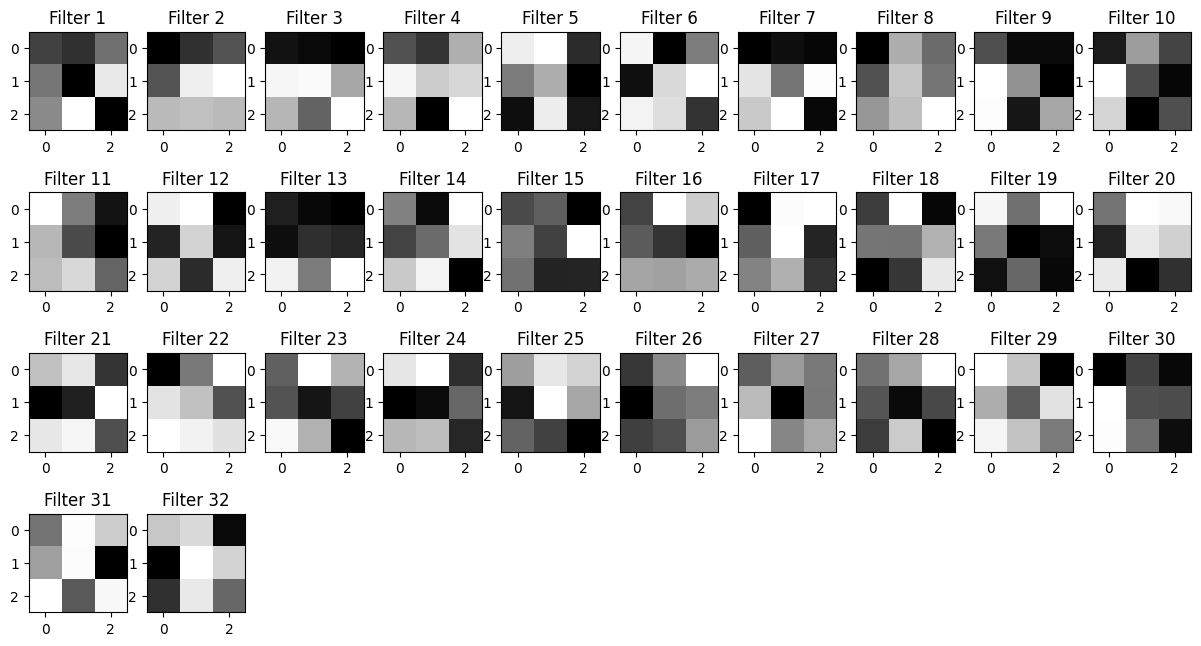

In [ ]:
W1 = model.layers[0].get_weights()[0] # 가중치 추출
W1 = model.layers[0].get_weights()[0][:,:,0,:] # 가중치 배열 형태 조정

# 가중치 정보 확인
print(type(W1), W1.shape)
print()
print("Filter 1 in the first convolution layer : ")
print(W1[:,:,0])

plt.figure(1, figsize=(15,8))

# 필터 별 가중치 시각
for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(W1[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

### 두 번째 컨볼루션 레이어의 가중치 시각화

<class 'numpy.ndarray'> (9, 32, 64)

Filter 1 in the second convolution layer : 
[[-0.04528034 -0.08119033  0.04513594  0.06644303 -0.03519897 -0.04548377
  -0.03754255  0.00759023  0.06399865  0.06554263 -0.0412159   0.0542956
   0.03443075  0.03662027 -0.00835668 -0.06930999  0.0836053   0.01289728
  -0.04773585  0.01188238 -0.06009718  0.03047857  0.06679922 -0.07409878
   0.01281238  0.04794366  0.05781868  0.02921596 -0.06627862  0.01547856
   0.07528266 -0.07237866]
 [-0.03683593 -0.00343282  0.01166295  0.05698498  0.02481536  0.01705587
   0.01977669 -0.07895832  0.04982581 -0.08350911  0.05358839 -0.05558474
  -0.02454146 -0.0220714  -0.00431555  0.04624085 -0.03218062 -0.01162621
  -0.00919974 -0.01081858  0.0872796  -0.06794263  0.01019184  0.06630055
  -0.01242401  0.00513468 -0.06203493  0.08219679  0.06465815  0.08424632
  -0.03632059 -0.01868048]
 [ 0.06431258 -0.05209161  0.01865667 -0.00758024 -0.07217007 -0.01717415
  -0.02633957  0.05091158 -0.01333898  0.04171432  0

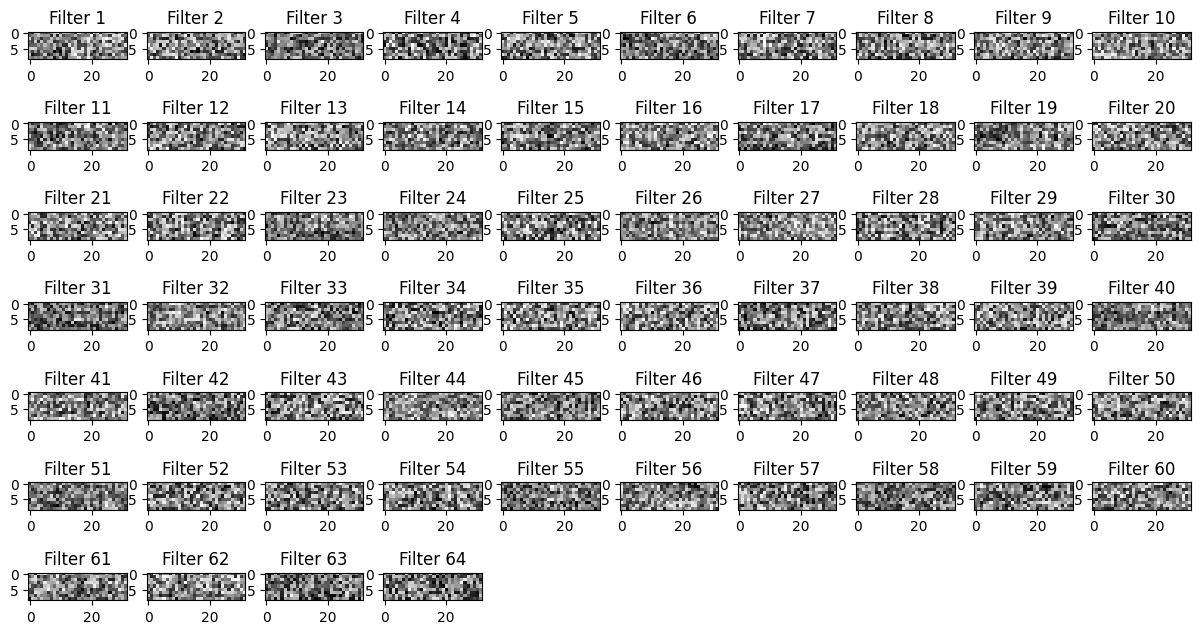

In [ ]:
W2 = model.layers[2].get_weights()[0] # 가중치 추출
W2 = W2.reshape(9,32,64) # 가중치 배열 형태 조정

# 가중치 정보 확인
print(type(W2), W2.shape)
print()
print("Filter 1 in the second convolution layer : ")
print(W2[:,:,0])

plt.figure(1, figsize=(15,8))

# 필터 별 가중치 시각
for i in range(0,64):
    plt.subplot(7,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(W2[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

## 2. 활성화 출력 시각화

### 첫 번째 컨볼루션 레이어의 활성화 시각화

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
(26, 26, 32)


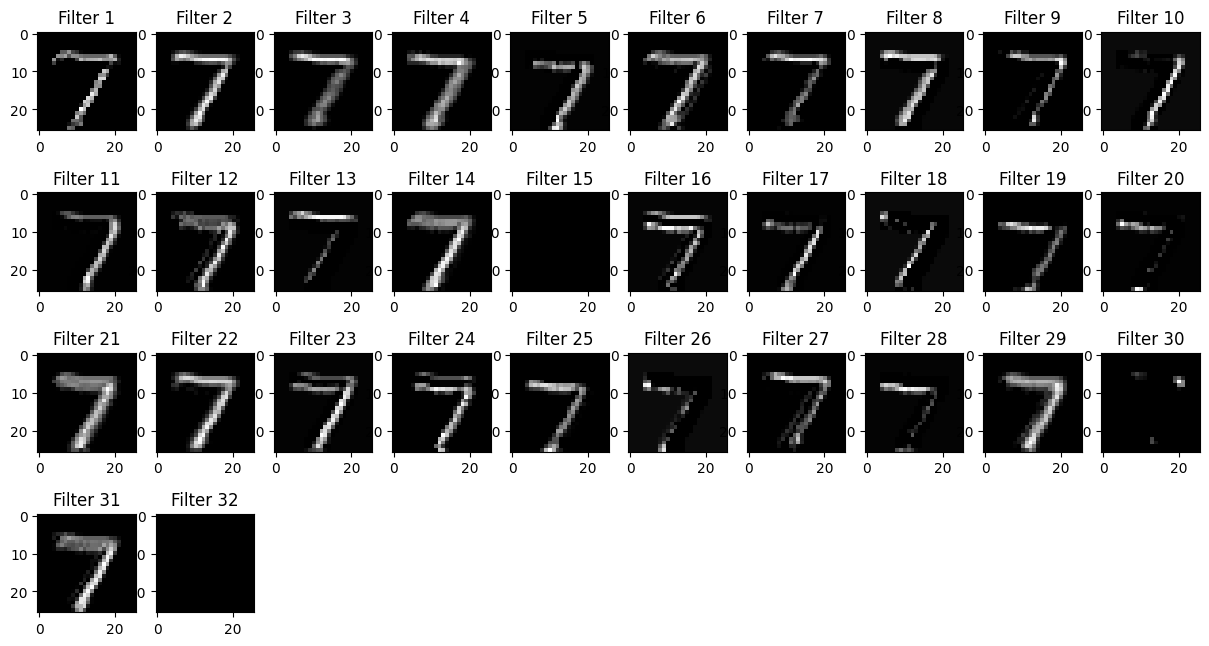

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, [3, 3], input_shape=input_shape))
model2.layers[0].set_weights(model.layers[0].get_weights())
model2.add(Activation("relu"))

x_rep = model2.predict(x_test[0:10])
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

원본 이미지 7이 첫번째 Convolution Layer를 통과했을 때, 각 필터에 대해 활성화되는 정보를 볼 수 있다.

각 필터가 7의 특정 부분에 대한 특성을 추출하도록 학습한다는 것을 알 수 있다.

### 두 번째 컨볼루션 레이어의 활성화 시각화

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
(24, 24, 64)


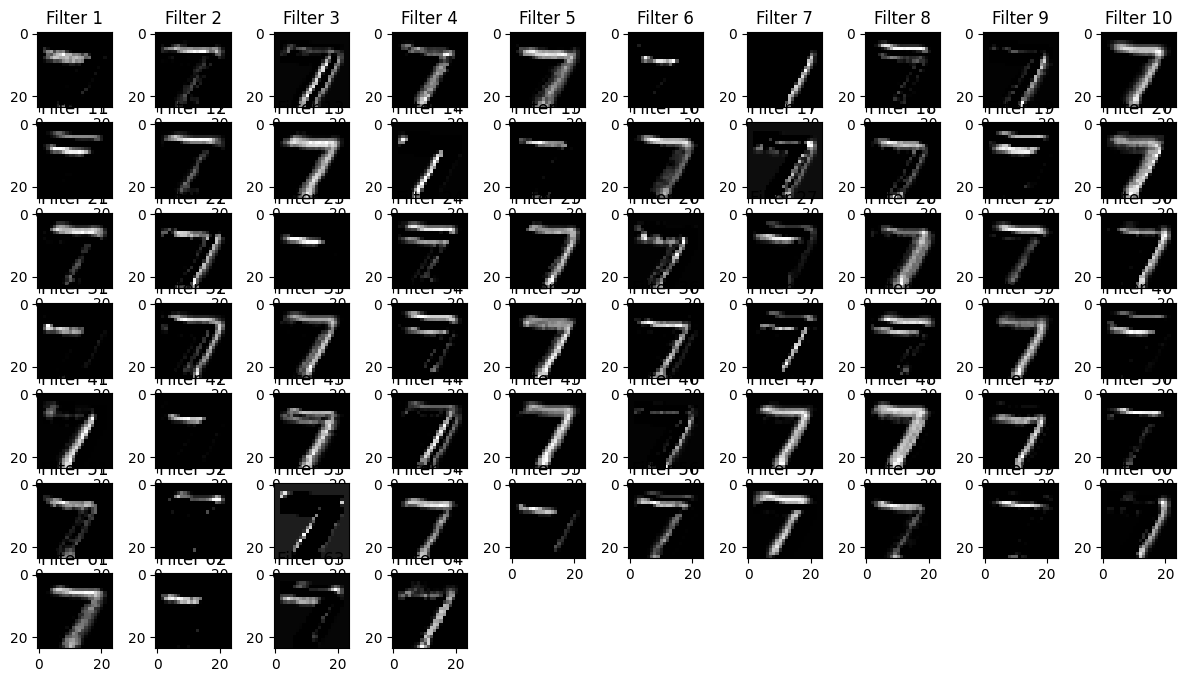

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, [3, 3], input_shape=input_shape))
model3.layers[0].set_weights(model.layers[0].get_weights())
model3.add(Activation("relu"))
model3.add(Conv2D(64, [3, 3]))
model3.layers[2].set_weights(model.layers[2].get_weights())
model3.add(Activation("relu"))

x_rep = model3.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,64):
    plt.subplot(7,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

첫번째 Convolution Neural처럼 각 필터들이 7에서 주목하는 부분이 다른 것을 볼 수 있다.

더 다양한 7의 패턴이 있는 것으로 보아 두번째 Convolution Neural이 첫번째 층보다 더 다양한 정보를 추출하고 있는 것으로 볼 수 있다.